<img src="img/USA.png" alt="Italian Trulli" width="1200" height="500">

<div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>US Visa Prediction Project</b></div>



**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

<div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>1. Problem statement</b></div>

* Office of Foreign Labor Certification (OFLC) gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications. 
* As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

    **In this project we are going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

<div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>2. Data Collection</b></div>

* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

<div style="padding:15px;color:white;margin:0;font-size:15px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>2.1 Import Data and Required Packages</b></div>

**Importing Pandas, Numpy, Matplotlib, Seaborn and Important Libraries.**

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,mannwhitneyu
from sklearn.preprocessing import OneHotEncoder
from scipy.stats.contingency import chi2_contingency

warnings.filterwarnings('ignore')
%matplotlib inline

<div style="padding:15px;color:white;margin:0;font-size:15px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>2.2 Import the CSV Data as Pandas DataFrame</b></div>

In [3]:
df_USA=pd.read_csv('data/EasyVisa.csv')

**Show Top 5 Records**

In [4]:
df_USA.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Shape of the dataset**

In [5]:
df_USA.shape

(25480, 12)

**Summary of the dataset**

In [6]:
df_USA.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Check Datatypes in the dataset**

In [7]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>3. EXPLORING DATA</b></div>

**Defining numerical and categorical column**

In [8]:
numerical_column=df_USA.select_dtypes(exclude='object').columns.to_list()
categorical_columns=df_USA.select_dtypes(include='object').columns.to_list()

print(f'We have {len(numerical_column)} numerical features : {numerical_column}')
print(f'We have {len(categorical_columns)} categorical features : {categorical_columns}')

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


**Identify unique category values**

In [9]:
for column in df_USA[categorical_columns]:
    print(f'{column}: {df_USA[column].unique()}')

case_id: ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']
continent: ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
education_of_employee: ['High School' "Master's" "Bachelor's" 'Doctorate']
has_job_experience: ['N' 'Y']
requires_job_training: ['N' 'Y']
region_of_employment: ['West' 'Northeast' 'South' 'Midwest' 'Island']
unit_of_wage: ['Hour' 'Year' 'Week' 'Month']
full_time_position: ['Y' 'N']
case_status: ['Denied' 'Certified']


**Proportion of count data on categorical columns**

In [10]:
for column in df_USA.columns:
    print(df_USA[column].value_counts(normalize=True)*100)
    print("X------------------------X---------------------------X")
    

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
X------------------------X---------------------------X
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
X------------------------X---------------------------X
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
X------------------------X---------------------------X
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
X------------------------X---------------------------X
requires_job_training
N    88.402669
Y  

**Insights**
 - `case_id` has unique values for each column:
    - `case_id` is a unique identifier for each row and does not carry any meaningful information for analysis, it is a good to drop it. Dropping such columns helps in reducing dimensionality and simplifying the dataset.

 - `continent` column is highly biased towards Asia:
    - `continent` is imbalanced and biased towards one category (Asia), it might impact the performance of models, especially when using machine learning algorithms. Combining other categories to form a single category or addressing the imbalance in some way could be a valid approach.

 - `unit_of_wage` seems to be an important column as most of them are yearly contracts:
    - majority of values in `unit_of_wage` represent yearly contracts, it suggests a potential pattern or dominance of a specific type of contract duration.

 - `case_status`, which is a binary classification target variable with classes: "Certified" and "Denied". We can see Certified class is dominating here.     
    - In imbalanced datasets, where one class significantly outnumbers the other, machine learning models may be biased towards the majority class.
    - techniques such as:
        - `Resampling`: oversampling the minority class, undersampling the majority class, or a combination of both to balance the class distribution. 
        -  `Weighted Classes`: can use `class_weight` parameter to  assigning higher weights to the minority class, you can make the model more sensitive to it.
        - `Evaluation Metrics`: Use evaluation metrics such as precision, recall, F1-score, or area under the Receiver Operating Characteristic (ROC) curve that consider both false positives and false negatives, especially in imbalanced datasets rather than accuracy.

<div style="padding:15px;color:white;margin:0;font-size:15px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>3.1 Univariate Analysis</b></div>

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

    **Other Type of Analysis are :**
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

**Boxplot**

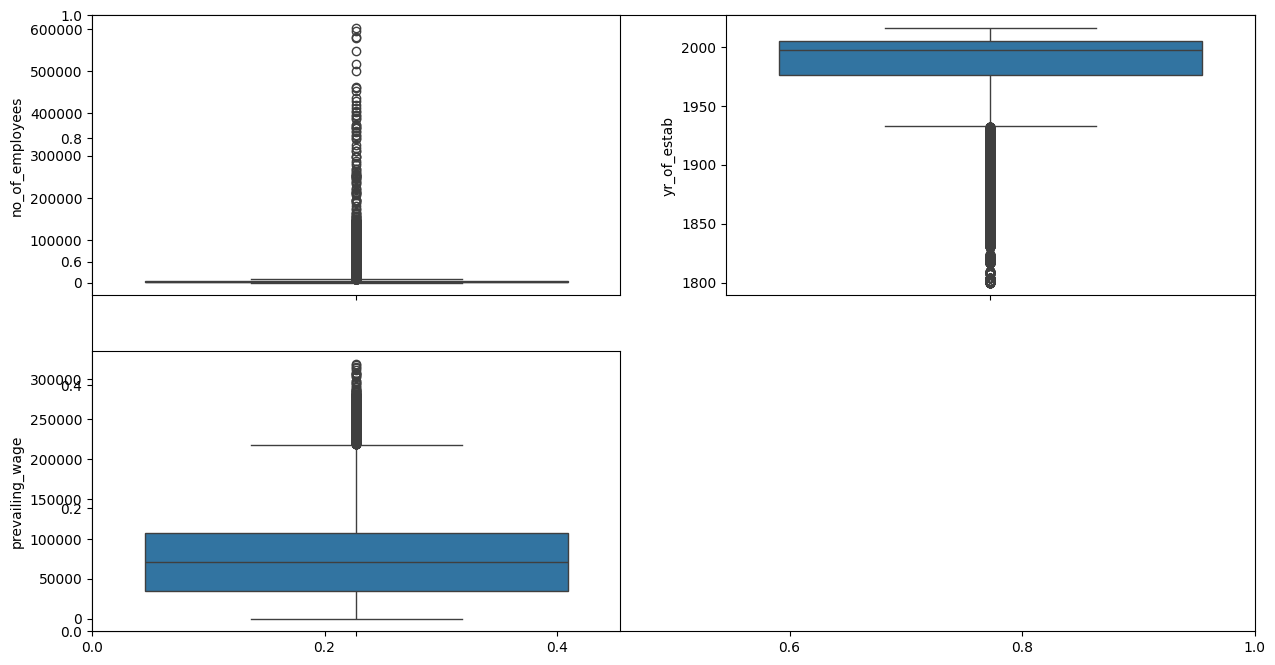

In [38]:
plt.subplots(figsize=(15,8))
for i in range(len(numerical_column)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df_USA[numerical_column[i]])

**Insight**
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `yr_of_estab`: we need to convert it into company_age and lets check again.


In [39]:
df_copy=df_USA.copy()

In [43]:
currentdate=date.today()
df_copy['company_age']=currentdate.year-df_copy.yr_of_estab
df_copy.drop(columns=['yr_of_estab'],inplace=True)

In [45]:
df_copy.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


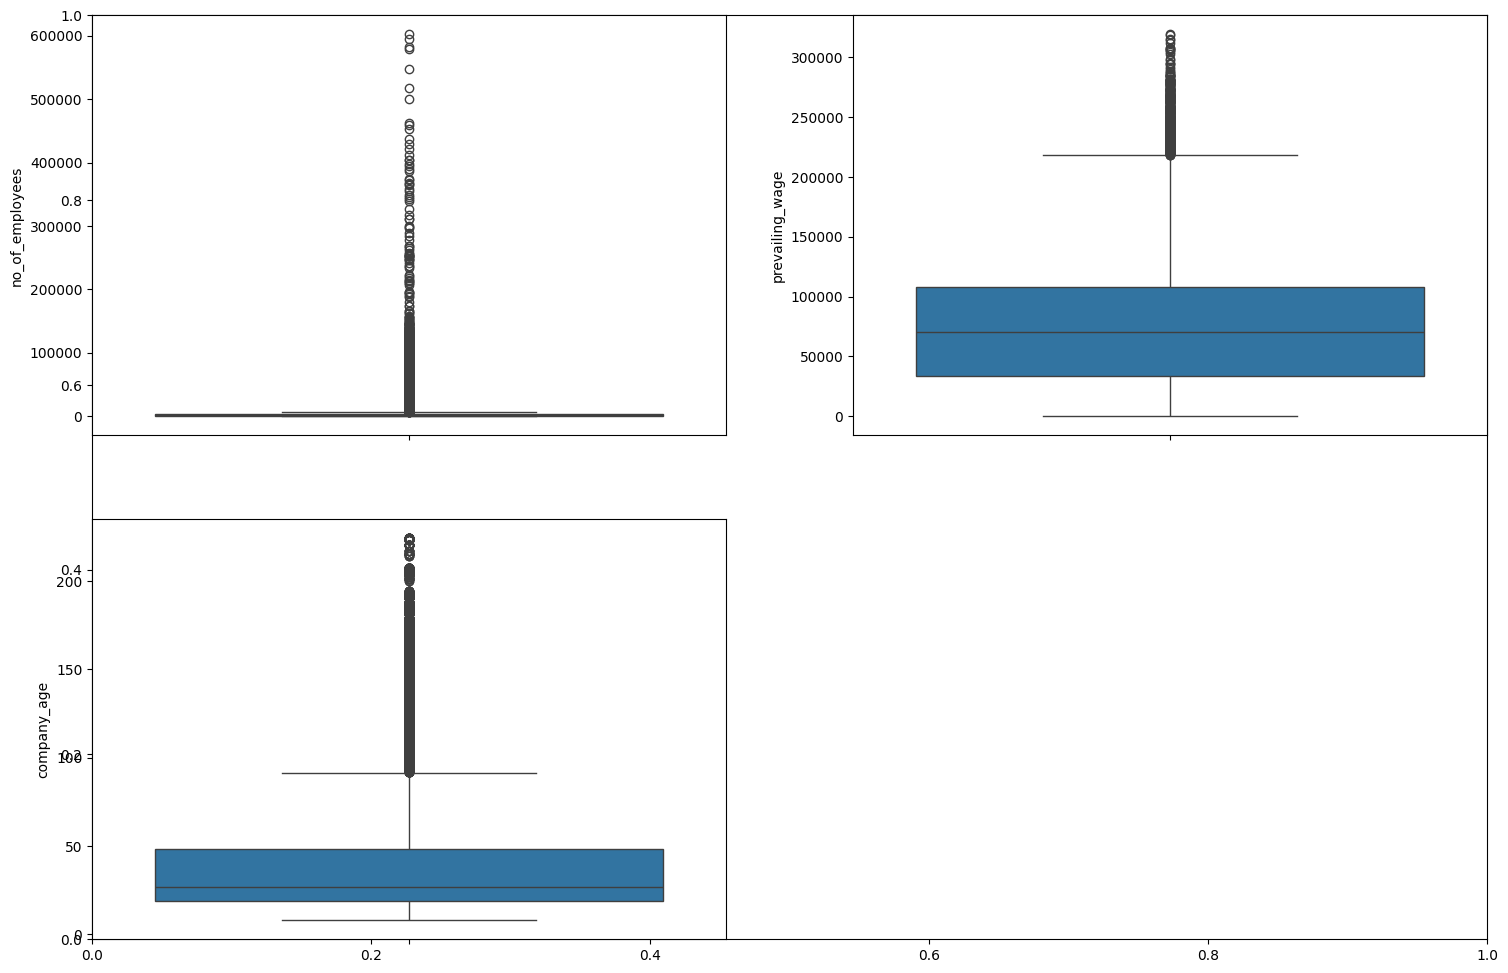

In [50]:
plt.subplots(figsize=(18,12))
for i in range(len(['no_of_employees','prevailing_wage','company_age'])):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df_copy[['no_of_employees','prevailing_wage','company_age'][i]])

**Insight**
-  `company_age`: there is outliers aslo need to handle it.
-  `no_of_employees,prevailing_wage,company_age` all 3 of these columns have outliers, but since there are lot of outliers removing them will leads to loosing data. So we can try techniques like feature transformation.


**Histogram**

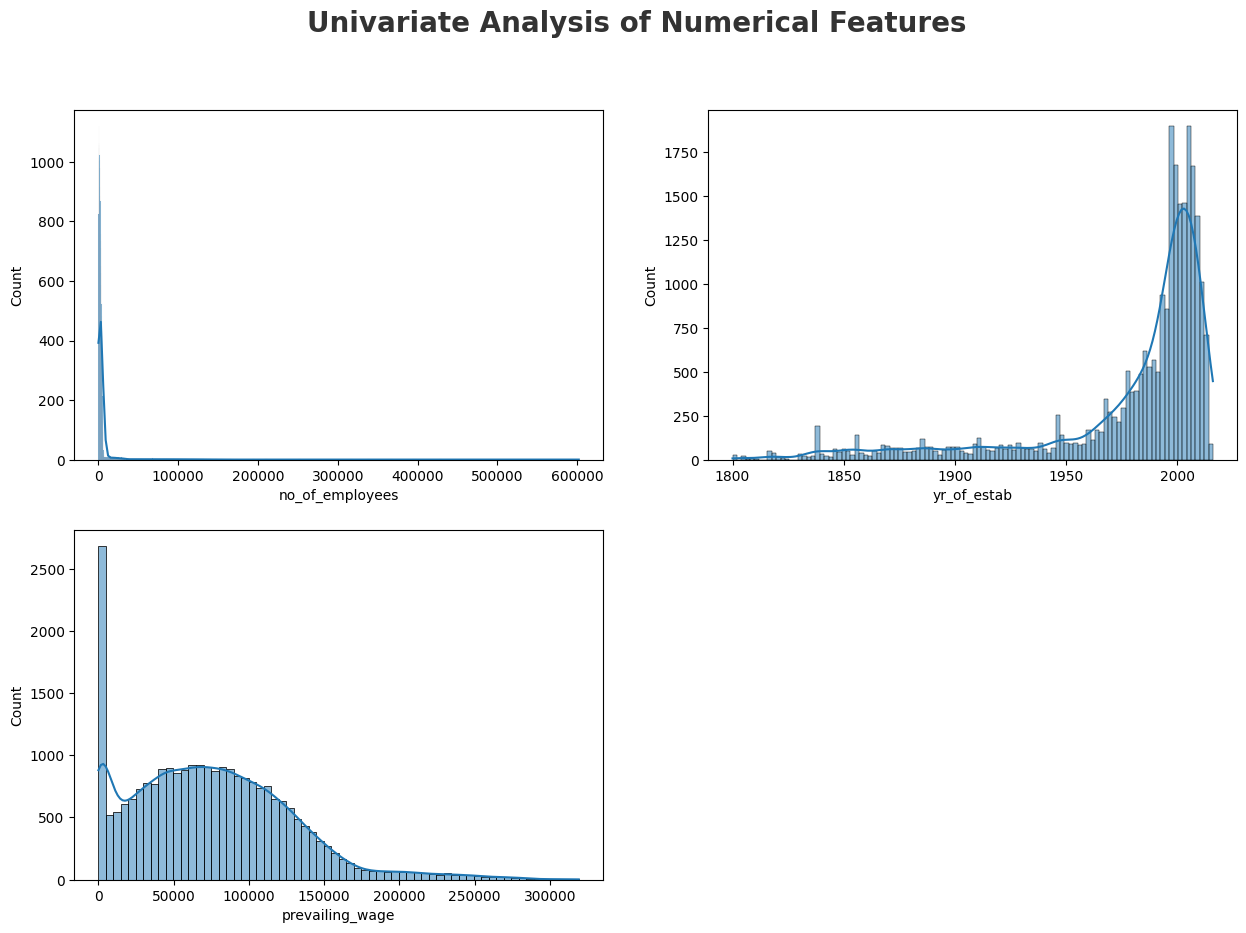

In [12]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8)


for i in range(len(numerical_column)):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df_USA[numerical_column[i]],kde=True)

**Insights**
 - `no_of_employees` column looks more skewed but it may be because of outlies.
 - `privailing-wage` is a right-skewed distribution, and most values are 0.

**Countplot**

In [13]:
categorical_columns.remove('case_id')

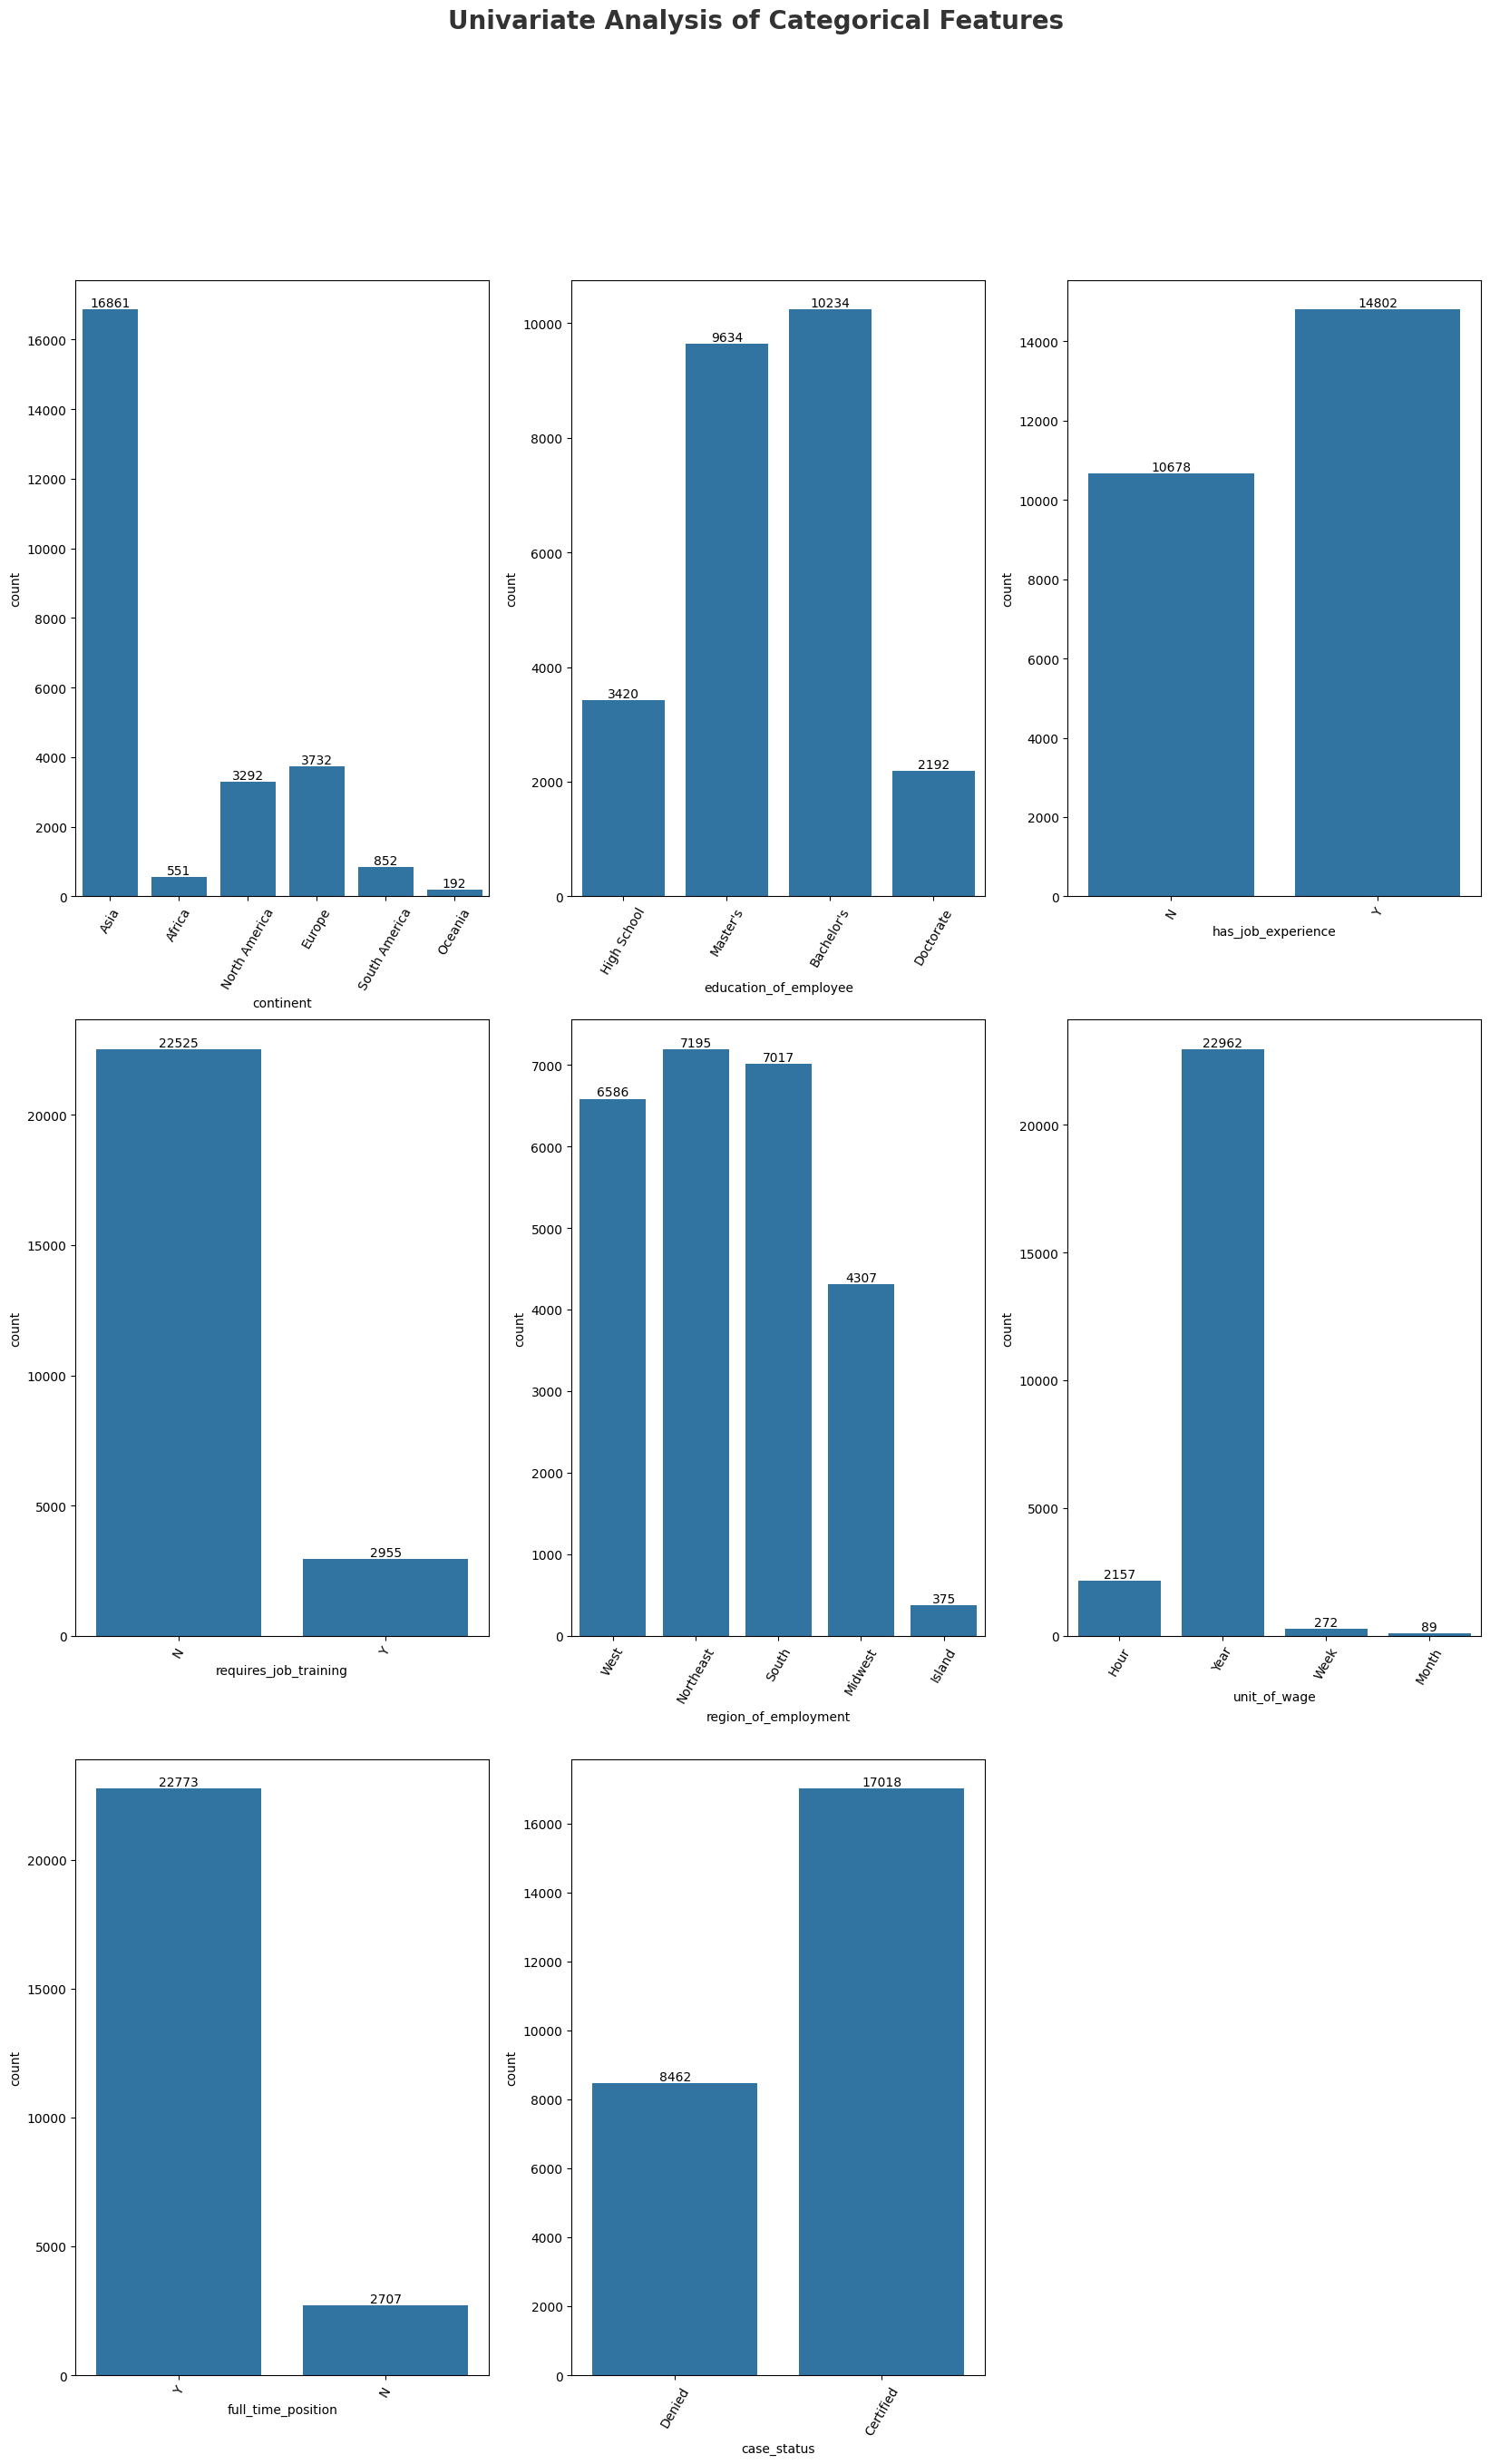

In [14]:
plt.figure(figsize=(20, 30))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8)


for i in range(len(categorical_columns)):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x=df_USA[categorical_columns[i]])
    for label in ax.containers:
        ax.bar_label(label)
    plt.xticks(rotation=60)

**Insights**
 - `requires_job_training`, `unit_of_wage`, `full_time_position` and `continents` coulmns have signle category dominating.
 - In rest of the columns are balanced.


<div style="padding:15px;color:white;margin:0;font-size:15px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>3.2 Multivariate Analysis Analysis</b></div>

**Heatmap**

In [15]:
df2=df_USA.copy()
df2.drop(columns=['case_id'],inplace=True)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [17]:

one_hot_encoder = OneHotEncoder(drop='first')

# Fit and transform on the data
encoded_data = one_hot_encoder.fit_transform(df2[categorical_columns],).toarray()

# Convert the result to a DataFrame for easier inspection
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

df3=pd.concat([df2[numerical_column],encoded_df],axis=1)


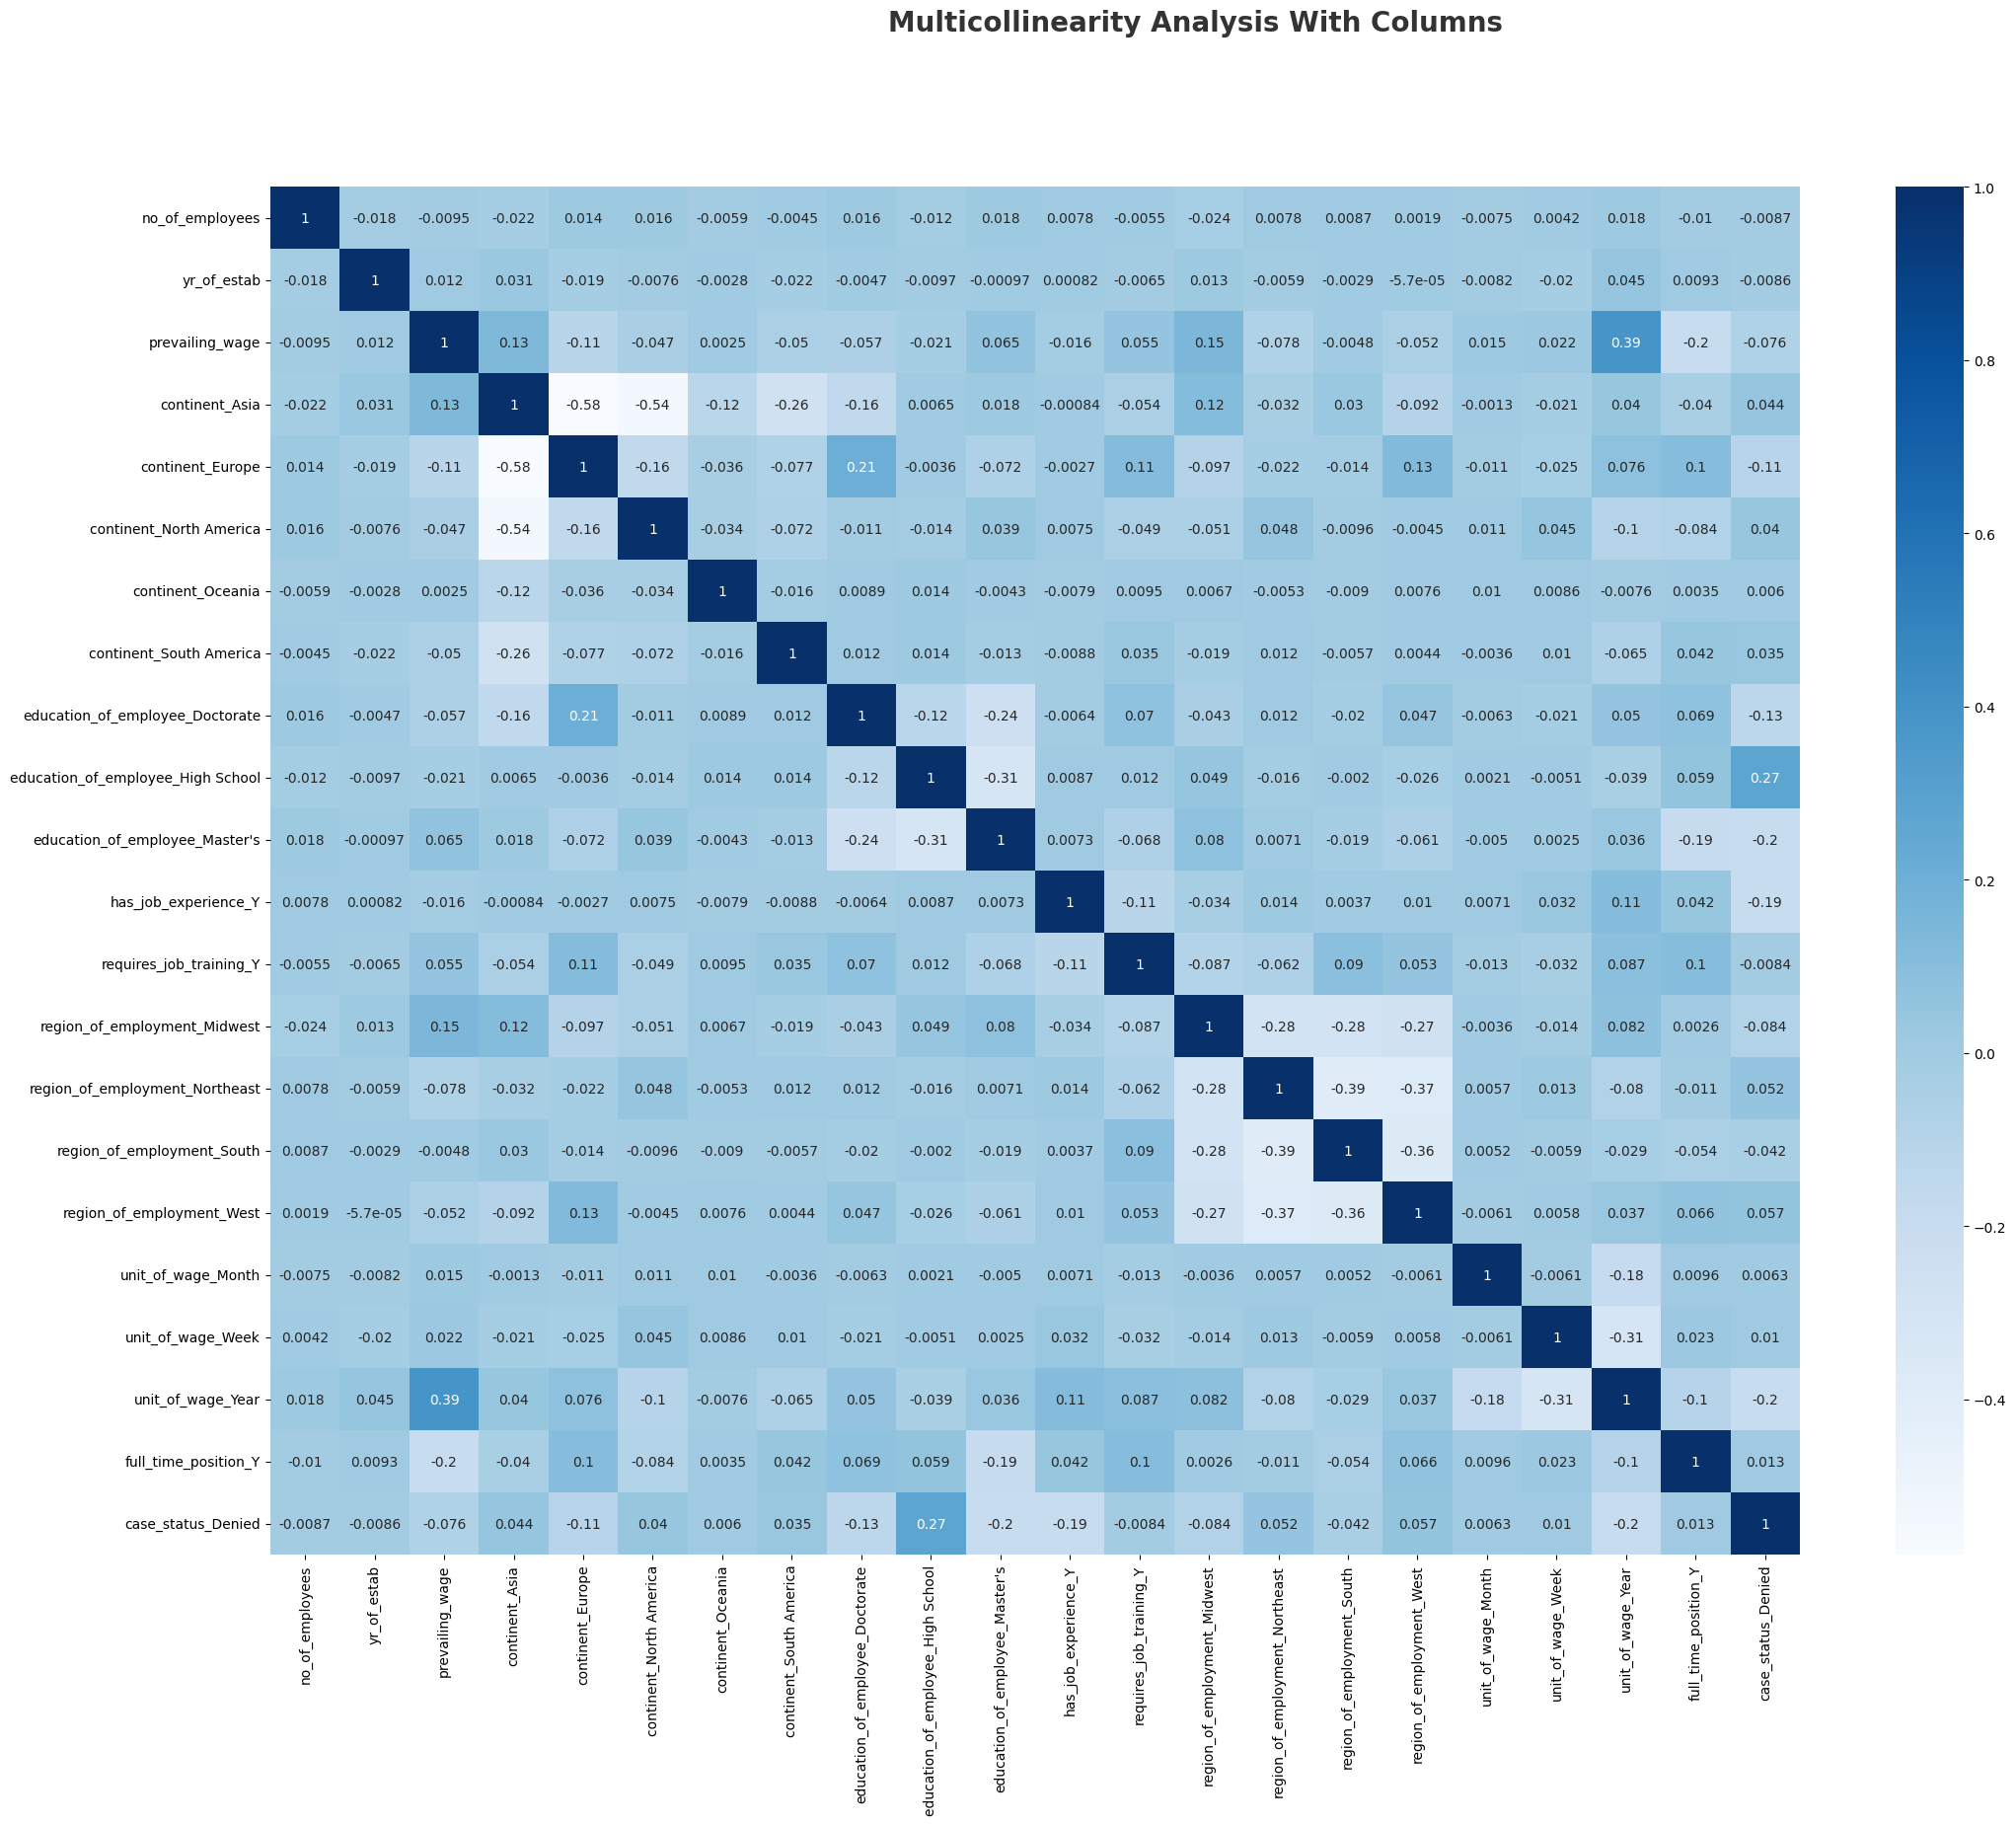

In [18]:
plt.figure(figsize = (25,18))
plt.suptitle('Multicollinearity Analysis With Columns', fontsize=20, fontweight='bold', alpha=0.8)
sns.heatmap(df3.corr(), cmap="Blues", annot=True)
plt.show()

**Insights**
 - There is no multicollinearity between any features.

**significancy test among , categorical target variable vs categorical IDV**
- we are using chi-square test.

In [19]:
for col in categorical_columns:
    cross_tab=pd.crosstab(df_USA.case_status, df_USA[col])
    chi2_stat, p_value_chi, a, b = chi2_contingency(cross_tab)
    if p_value_chi>0.05:
        print(f'case_status vs {col},{p_value_chi:.20f}')

case_status vs requires_job_training,0.18556470819406772899


**Insight**
- For `case_status vs requires_job_training` test result:  Failed to reject H0.
- Categorical column `requires_job_training` is not significant with `case_status`.

**significancy test among , categorical target variable vs numerical IDV**
- since its a binary classification we use t-test else if its a multiclass classification we will use Anova here.
- I am also using mannwhitneyu test(if distribution is not normal)
- Null hypothesis (H0): there is no significance between variables
- Ha: there is significant relationship between variables

In [20]:

for column in numerical_column:

    category_groups = [group_data[column] for category, group_data in df_USA.groupby('case_status')]
    u_statistic, p_value_u = mannwhitneyu(*category_groups)
    t_statistic, p_value = ttest_ind(*category_groups)

    print(f"T-test: t-statistic: {t_statistic}, p-value: {p_value}, column: {column}")
    
    print(f"mannwhitneyu-test: u-statistic: {t_statistic}, p-value: {p_value}, column: {column}")



T-test: t-statistic: 1.385029085357209, p-value: 0.16605570073088416, column: no_of_employees
mannwhitneyu-test: u-statistic: 1.385029085357209, p-value: 0.16605570073088416, column: no_of_employees
T-test: t-statistic: 1.3723112530814254, p-value: 0.16997864499944096, column: yr_of_estab
mannwhitneyu-test: u-statistic: 1.3723112530814254, p-value: 0.16997864499944096, column: yr_of_estab
T-test: t-statistic: 12.198062751568619, p-value: 3.963569807405774e-34, column: prevailing_wage
mannwhitneyu-test: u-statistic: 12.198062751568619, p-value: 3.963569807405774e-34, column: prevailing_wage


**Insight**
- For all these 3 features test result:  Failed to reject H0.
- All 3 numerical columns are not significant with `case_status`, also `prevailing_wage` has very high p-value. 


**Checking Null Values**

In [21]:
df_USA.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>4. Visualization</b></div>


<div style="padding:15px;color:white;margin:0;font-size:15px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>4.1 Visualize the Target Feature</b></div>

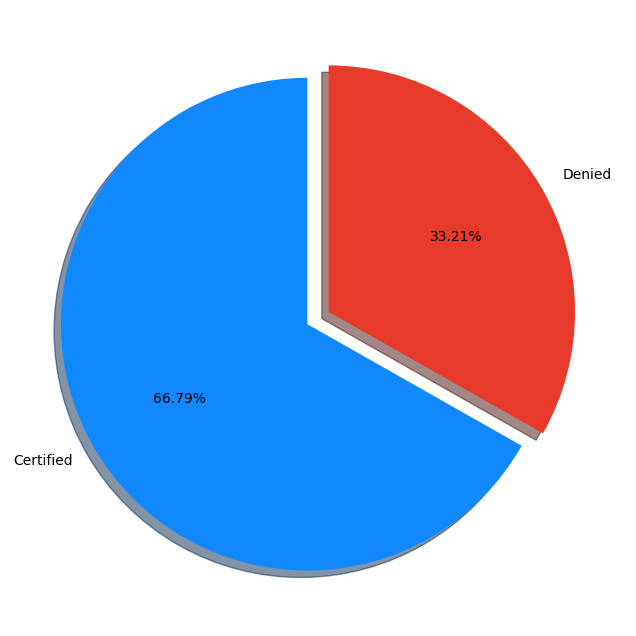

In [22]:
percentage=df_USA.case_status.value_counts(normalize=True)*100
fig,ax=plt.subplots(figsize=(15,8))
labels=["Certified","Denied"]
colors=['#1188ff','#e63a2a']
explode=(.05,.05)
ax.pie(percentage,labels=labels,colors=colors,explode=explode,
       startangle=90,shadow=True,autopct='%1.2f%%')

plt.show()

**Insight**
- Data imbalance is clearly visible here, Certified is dominating in  the dataset.



<div style="padding:15px;color:white;margin:0;font-size:15px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>4.2 Does applicant Continent has any impact on Visa status ?</b></div>

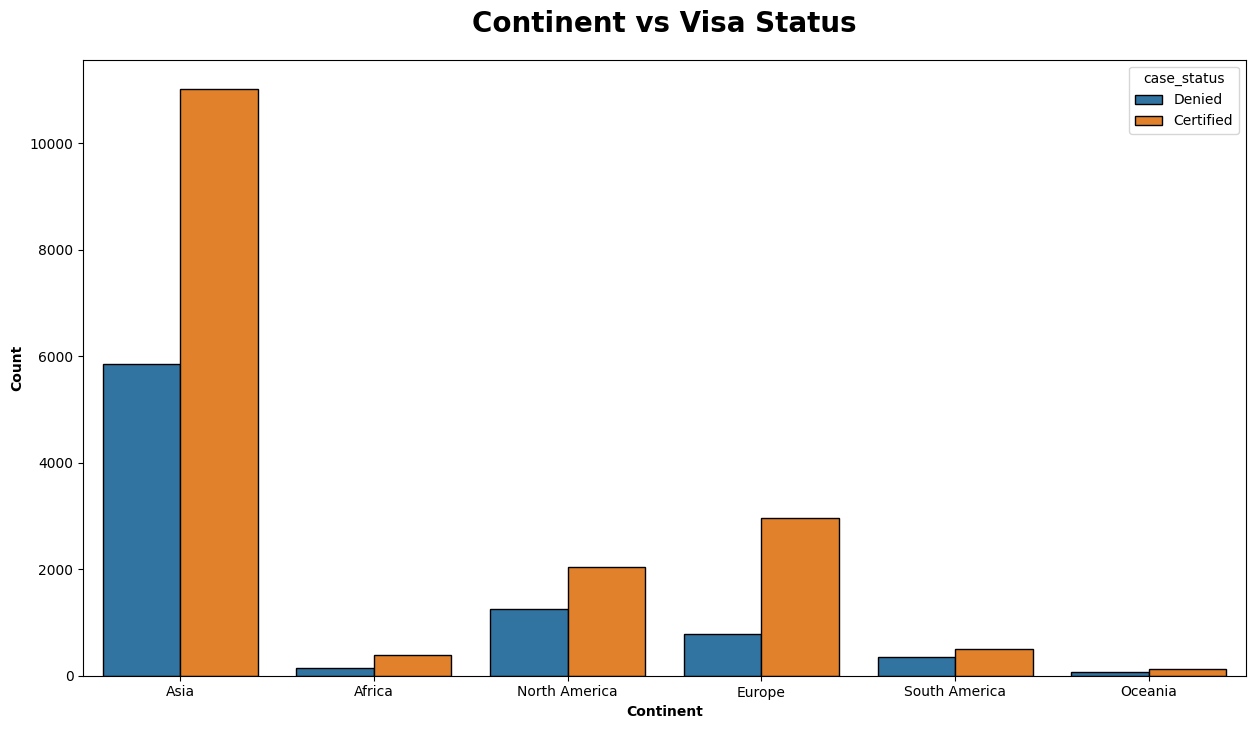

In [23]:
plt.subplots(figsize=(15,8))
sns.countplot(x='continent',hue='case_status',data=df_USA,ec='black')
plt.xlabel('Continent',fontsize=10,weight='bold')
plt.ylabel('Count',fontsize=10,weight='bold')
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.show()

In [24]:
df2=df_USA.copy()

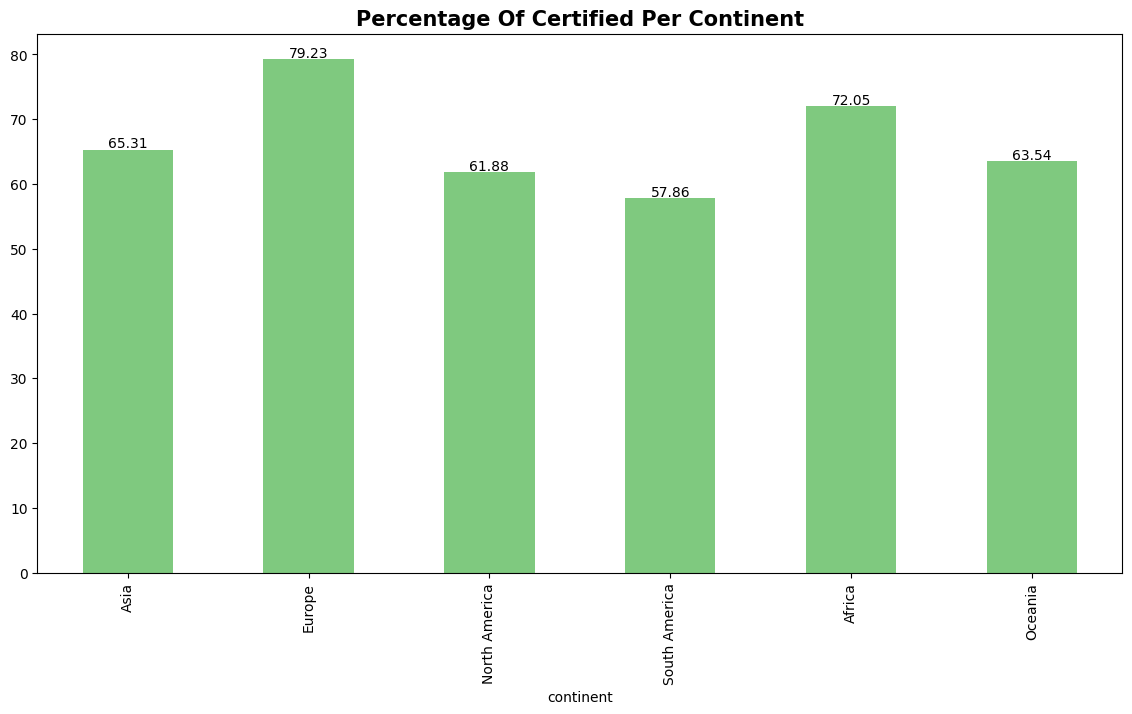

In [25]:
plt.figure(figsize=[14,7])
plt.title("Percentage Of Certified Per Continent" , fontsize = 15, fontweight ='bold'  )
percentage=(df2[df2.case_status.isin(['Certified'])].continent.value_counts()/df2.continent.value_counts() *100)
percentage.plot(kind='bar',colormap='Accent')
for i in range(percentage.shape[0]):
    count=f'{percentage[i]:.02f}'
    plt.text(i,percentage[i]+.3,count,ha='center')


**Insight:**
* As per the Chart Asia applicants applied more than other continents.
* Highest chance of getting certified if you are from `Europe` and followed by `Africa`

<div style="padding:15px;color:white;margin:0;font-size:15px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>4.3 Does applicant education has any impact on Visa status ?</b></div>

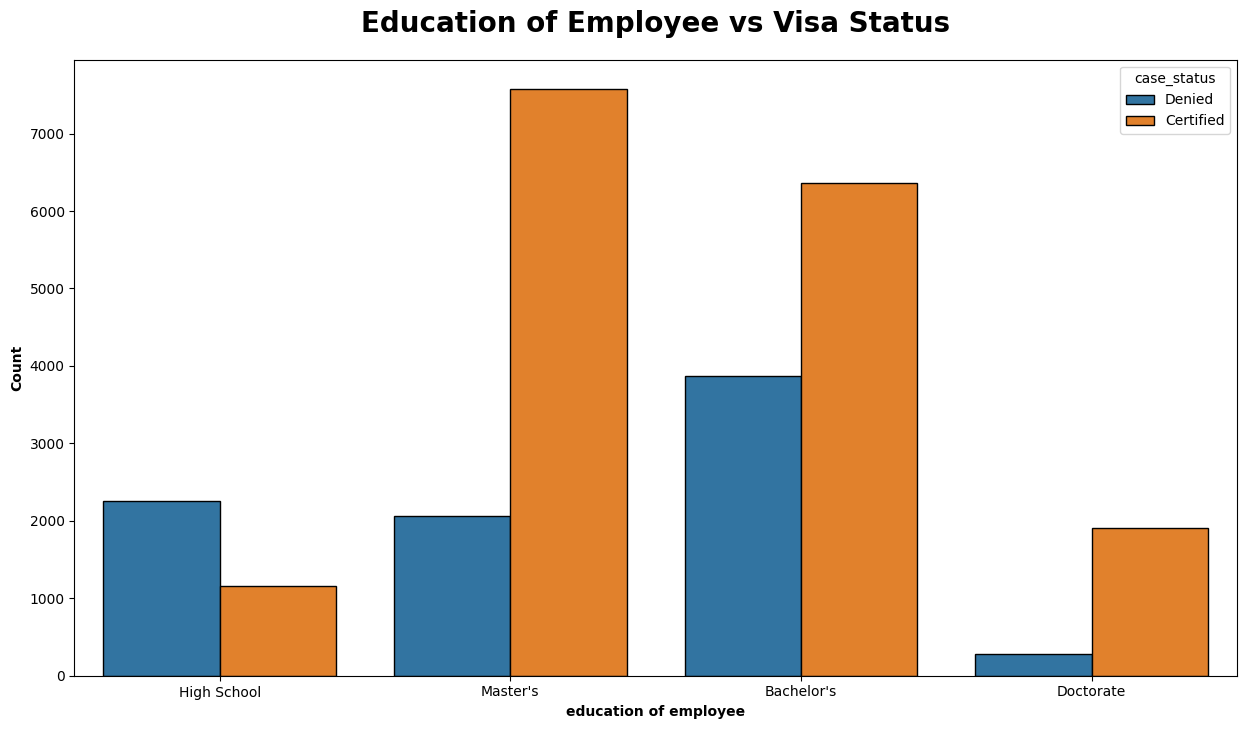

In [26]:
plt.subplots(figsize=(15,8))
sns.countplot(x='education_of_employee',hue='case_status',data=df_USA,ec='black')
plt.xlabel('education of employee',fontsize=10,weight='bold')
plt.ylabel('Count',fontsize=10,weight='bold')
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.show()

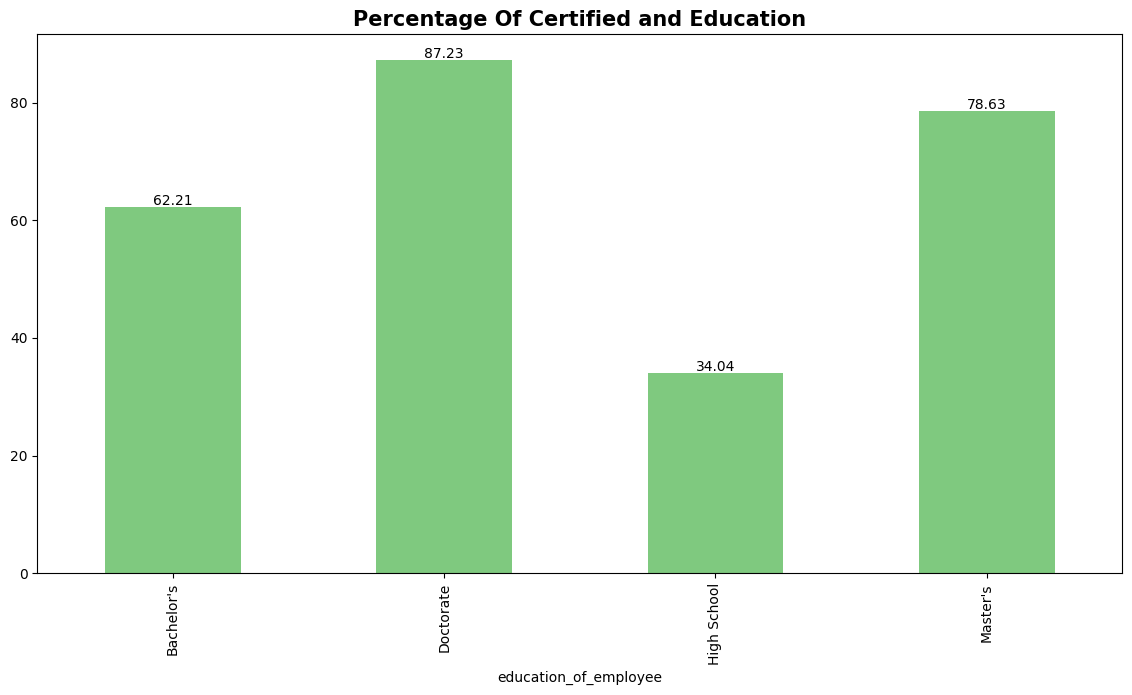

In [27]:
plt.figure(figsize=[14,7])
plt.title("Percentage Of Certified and Education" , fontsize = 15, fontweight ='bold'  )
percentage=(df2[df2.case_status.isin(['Certified'])].education_of_employee.value_counts()/df2.education_of_employee.value_counts() *100)
percentage.plot(kind='bar',colormap='Accent')
for i in range(percentage.shape[0]):
    count=f'{percentage[i]:.02f}'
    plt.text(i,percentage[i]+.3,count,ha='center')

**Insights**
- education status has high impact
- `Doctorate` and `Master's` graduates have higher chance of being accepted than the others.



<div style="padding:15px;color:white;margin:0;font-size:15px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>4.4 Does applicant's previous work experience has any impact on Visa status ?</b></div>

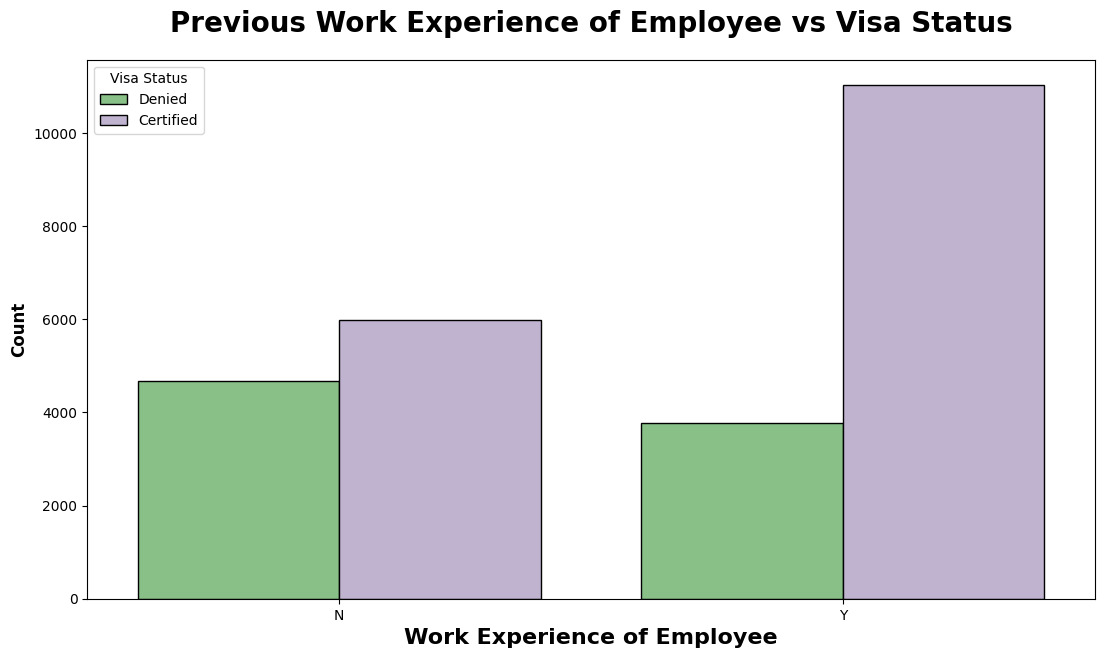

In [28]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df_USA, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

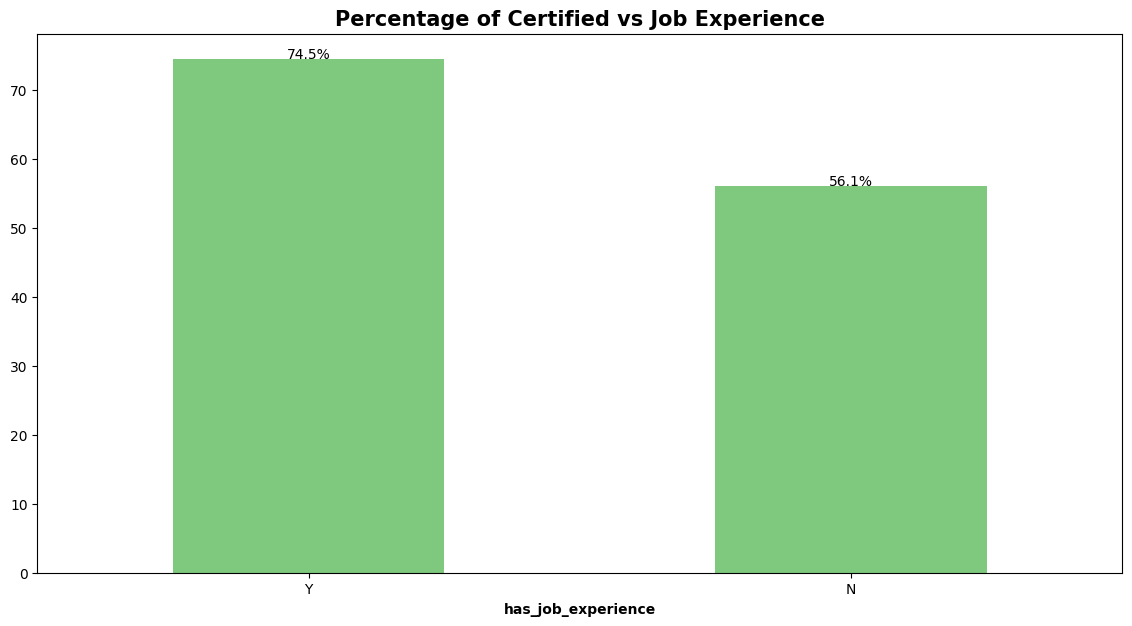

In [29]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insight**
* People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
* People with No previous work experience has been certified 56% and denied 43%.
* This means `work experience` has effect on `Visa status`.



<div style="padding:15px;color:white;margin:0;font-size:15px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>4.5 If the Employee requires job training, does it make any impact on visa status?</b></div>

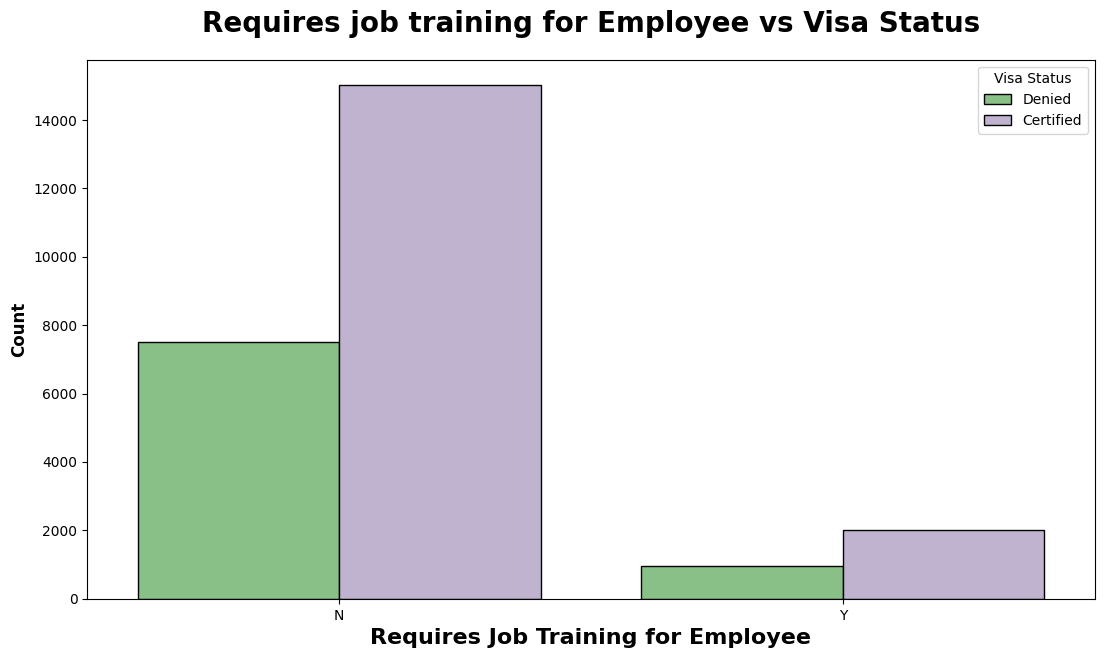

In [30]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df_USA, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

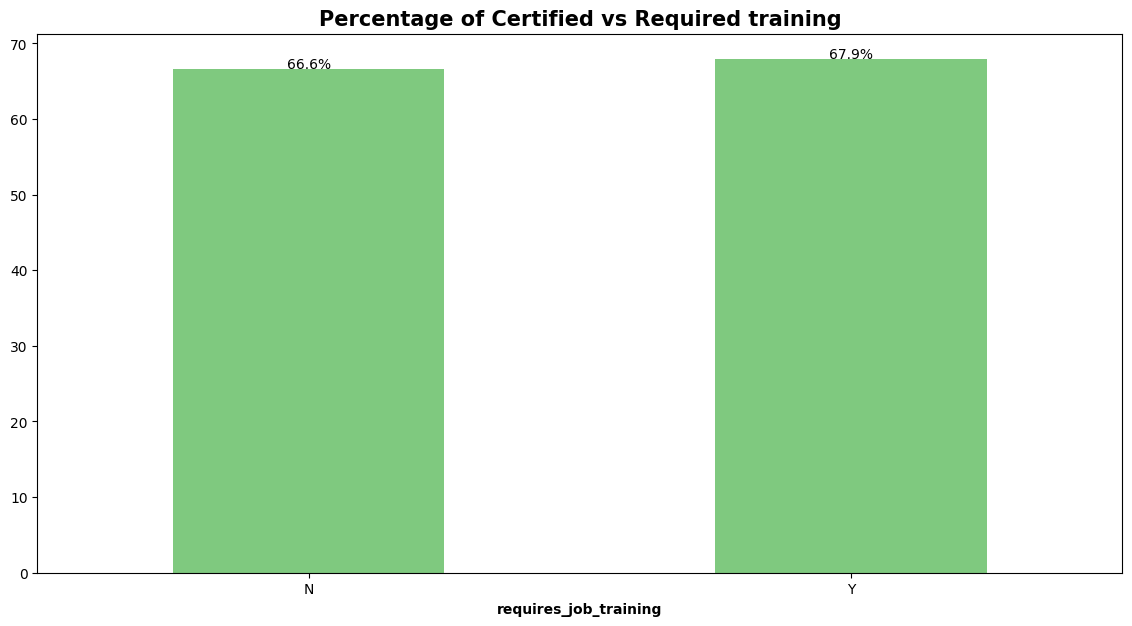

In [31]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insight**
* If employee requires job training and it doesn't have any effect on Visa status.
* As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.



<div style="padding:15px;color:white;margin:0;font-size:15px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>4.6 Wages and its impact on Visa status</b></div>

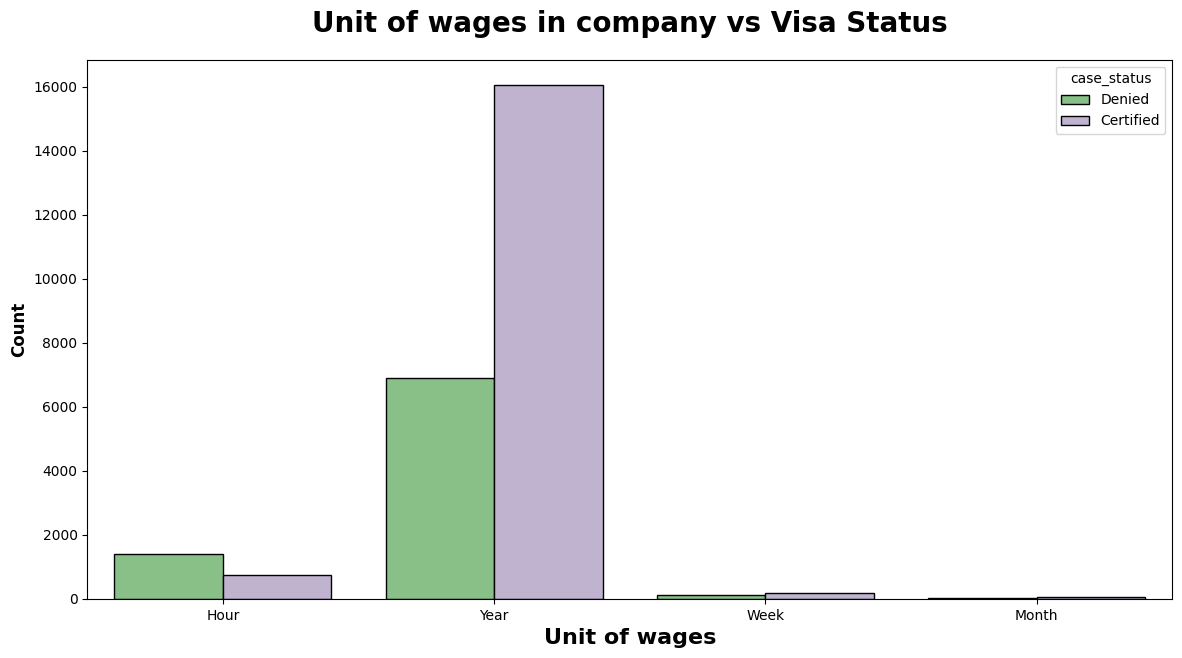

In [32]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df_USA,ec='k', palette='Accent')
plt.title("Unit of wages in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Unit of wages", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

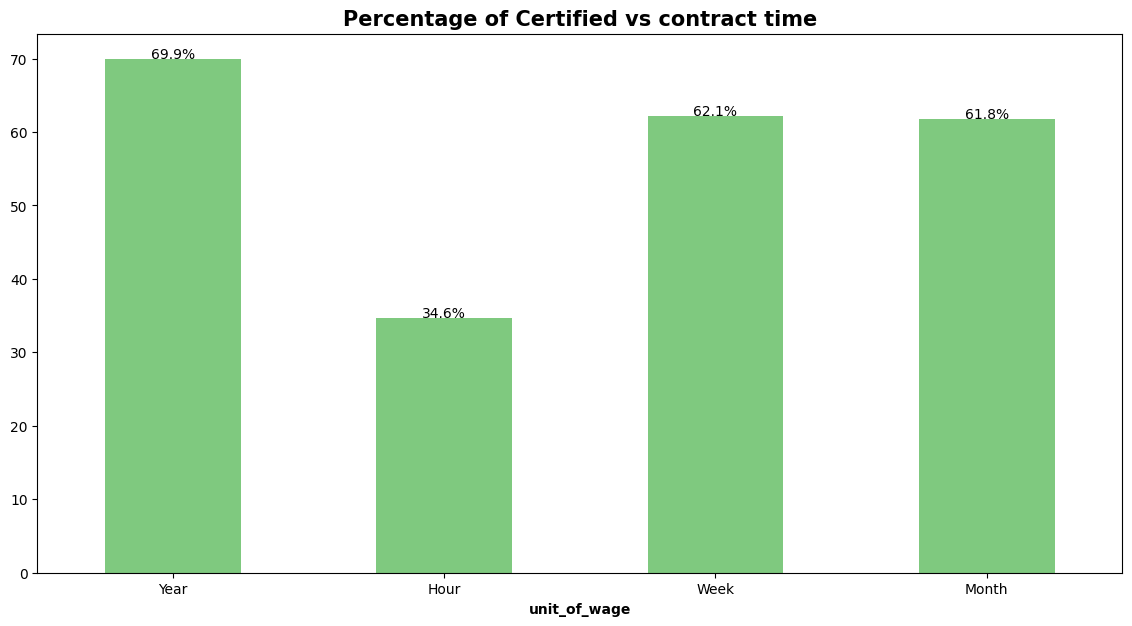

In [33]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insight**
* For employees who applied for hourly pay 65% of them were denied.
* Yearly unit wage application were accepted for 69% and denied for 31% of the time.
* There is a higher chance of yearly contract than other and immediately followed by week and month.

<div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>5. Final Report </b></div>



* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as **others**
* Target column `case_status` is imbalanced can be handled before model building.